In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cycler
import matplotlib as mpl
from wandb import Api

In [2]:
plt.style.use(["tableau-colorblind10", "seaborn-talk"])

In [3]:
dense_exp_runs = [
    "zc-emu-not-dense-v1-offline",
    "zc-emu-gsc-prior-precpd-simple-v2-offline",
    "zc-emu-using-dense-v1-offline",
    "zc-emu-not-dense-v1-online",
    "zc-emu-gsc-prior-precpd-simple-v2-online",
    "zc-emu-using-dense-v1-online",
]

rh_runs = [
    "zcemu-monthly-init-rh-in-m01-30d-v1-online",
    "zcemu-monthly-init-rh-in-m02-30d-v1-online",
    "zcemu-monthly-init-rh-in-m03-30d-v1-online",
    "zcemu-monthly-init-rh-in-m04-30d-v1-online",
    "zcemu-monthly-init-rh-in-m05-30d-v1-online",
    "zcemu-monthly-init-rh-in-m06-30d-v2-online",
    "zcemu-monthly-init-rh-in-m07-30d-v1-online",
    "zcemu-monthly-init-rh-in-m08-30d-v1-online",
    "zcemu-monthly-init-rh-in-m09-30d-v1-online",
    "zcemu-monthly-init-rh-in-m10-30d-v1-online",
    "zcemu-monthly-init-rh-in-m11-30d-v1-online",
    "zcemu-monthly-init-rh-in-m12-30d-v1-online",
]

seed5_runs = [
    "zc-emu-monthly-seed5-m01-30d-v1-online",
    "zc-emu-monthly-seed5-m02-30d-v1-online",
    "zc-emu-monthly-seed5-m03-30d-v1-online",
    "zc-emu-monthly-seed5-m04-30d-v1-online",
    "zc-emu-monthly-seed5-m05-30d-v1-online",
    "zc-emu-monthly-seed5-m06-30d-v1-online",
    "zc-emu-monthly-seed5-m07-30d-v1-online",
    "zc-emu-monthly-seed5-m08-30d-v1-online",
    "zc-emu-monthly-seed5-m09-30d-v1-online",
    "zc-emu-monthly-seed5-m10-30d-v1-online",
    "zc-emu-monthly-seed5-m11-30d-v1-online",
    "zc-emu-monthly-seed5-m12-30d-v1-online",
    "zc-emu-monthly-seed5-m01-30d-v1-offline",
    "zc-emu-monthly-seed5-m02-30d-v1-offline",
    "zc-emu-monthly-seed5-m03-30d-v1-offline",
    "zc-emu-monthly-seed5-m04-30d-v1-offline",
    "zc-emu-monthly-seed5-m05-30d-v1-offline",
    "zc-emu-monthly-seed5-m06-30d-v1-offline",
    "zc-emu-monthly-seed5-m07-30d-v1-offline",
    "zc-emu-monthly-seed5-m08-30d-v1-offline",
    "zc-emu-monthly-seed5-m09-30d-v1-offline",
    "zc-emu-monthly-seed5-m10-30d-v1-offline",
    "zc-emu-monthly-seed5-m11-30d-v1-offline",
    "zc-emu-monthly-seed5-m12-30d-v1-offline",
]

precip_runs = [
    "zc-emu-precip-strict-conserve-v1-online",
    "zc-emu-precip-simple-conserve-v1-online",
    "zc-emu-precip-no-conserve-v1-online"
]

seeded_runs = [
    "zc-emu-seed1-prognostic-30d-v2-online",
    "zc-emu-seed2-prognostic-30d-v2-online",
    "zc-emu-seed3-prognostic-30d-v2-online",
    "zc-emu-seed4-prognostic-30d-v2-online",
    "zc-emu-seed5-prognostic-30d-v2-online",
    "zc-emu-seed1-prognostic-30d-v2-offline",
    "zc-emu-seed2-prognostic-30d-v2-offline",
    "zc-emu-seed3-prognostic-30d-v2-offline",
    "zc-emu-seed4-prognostic-30d-v2-offline",
    "zc-emu-seed5-prognostic-30d-v2-offline",
]

gscond_seeds = [
    "zc-emu-normfix-seed0-prognostic-30d-v1-online",
    "zc-emu-normfix-seed1-prognostic-30d-v1-online",
    "zc-emu-normfix-seed2-prognostic-30d-v1-online",
    "zc-emu-normfix-seed3-prognostic-30d-v1-online",
    "zc-emu-normfix-seed4-prognostic-30d-v1-online",
    "zc-emu-monthly-normfix-m06-30d-v1-online",
]

gscond_seed2 = [
    "zc-emu-monthly-normfix-m01-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m02-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m03-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m04-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m05-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m06-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m07-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m08-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m09-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m10-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m11-seed2-30d-v1-online",
    "zc-emu-monthly-normfix-m12-seed2-30d-v1-online",
]

gscond_seed3 = [
    "zc-emu-monthly-normfix-m01-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m02-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m03-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m04-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m05-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m06-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m07-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m08-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m09-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m10-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m11-seed3-30d-v1-online",
    "zc-emu-monthly-normfix-m12-seed3-30d-v1-online",
]

gscond_seed3_offline = [
    "zc-emu-monthly-normfix-m01-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m02-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m03-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m04-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m05-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m06-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m07-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m08-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m09-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m10-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m11-seed3-30d-v1-offline",
    "zc-emu-monthly-normfix-m12-seed3-30d-v1-offline",
]


precpd_sensitivity = [
    "zc-emu-seedsweep-gsc1-cls5-prpd0-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls5-prpd1-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls5-prpd2-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls5-prpd3-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls5-prpd4-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls5-prpd5-jul-v2-online",
]

classifier_sensitivity = [
    "zc-emu-seedsweep-gsc1-cls0-prpd5-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls1-prpd5-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls2-prpd5-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls3-prpd5-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls4-prpd5-jul-v2-online",
    "zc-emu-seedsweep-gsc1-cls5-prpd5-jul-v2-online",
]

phase_dep = [
    "zc-emu-temp-in-adjust-phase-dep-gscond-30d-v3-online",
    "zc-emu-temp-in-adjust-phase-dep-gscond-30d-v3-offline"
]

classifier_runs = [
    "zc-emu-no-gscond-classify-v2-online",
]

all_runs = (
    dense_exp_runs + seeded_runs + rh_runs + seed5_runs + 
    gscond_seeds + precip_runs + phase_dep + classifier_runs +
    gscond_seed2 + gscond_seed3 + gscond_seed3_offline + precpd_sensitivity + 
    classifier_sensitivity
)


In [4]:
api = Api()

def _get_run_summary(group):
    runs = api.runs(
        "ai2cm/microphysics-emulation",
        filters={"group": {"$regex": group}},
    )

    summary_stats = {}
    for run in runs:
        summary_stats.update(run.summary)

    return summary_stats
        


In [5]:
summary = _get_run_summary(all_runs[0])

In [6]:
[k for k in summary if "duration" in k]

['duration_seconds']

In [7]:
skill_keys = [key for key in summary.keys() if "column_skill" in key]

In [8]:
columns = sorted(skill_keys)
columns.insert(2, columns[-2])
columns.insert(3, columns[-1])
columns = columns[:-2]

In [9]:

columns = [
    'column_skill/air_temperature',
    'column_skill/cloud_water',
    'column_skill/specific_humidity',
    'column_skill/surface_precipitation',
    'column_skill/gscond/air_temperature',
    'column_skill/gscond/cloud_water',
    'column_skill/gscond/specific_humidity',
    'column_skill/precpd/air_temperature',
    'column_skill/precpd/cloud_water',
    'column_skill/precpd/specific_humidity',
    "tropical_average_temp_near_tropopause_5d_k",
    "antarctic_avg_column_integrated_cloud_5d_kg",
    'drifts/air_temperature/10day',
    'drifts/cloud_water_mixing_ratio/10day',
    'drifts/specific_humidity/10day',
    'duration_seconds'
]


In [10]:
def _get_summary_df(group):
    summary = _get_run_summary(group)
    summary = {col_name: summary.get(col_name, None) for col_name in columns}
    return pd.DataFrame(summary, index=[group])

In [11]:
all_dfs = [_get_summary_df(group) for group in all_runs]
all_run_data = pd.concat(all_dfs)



In [11]:
all_run_data.to_csv("metrics.csv")

In [12]:
seed_ensemble = all_run_data.filter(regex="zc-emu-*seed[0-5].*online", axis=0)

In [13]:
def get_seed_num_from_name(row):
    name = row.name
    pattern = re.compile(r"seed(\d)")
    return pattern.search(name).group(1)

In [14]:
seed_ensemble

,column_skill/air_temperature,column_skill/cloud_water,column_skill/specific_humidity,column_skill/surface_precipitation,column_skill/gscond/air_temperature,column_skill/gscond/cloud_water,column_skill/gscond/specific_humidity,column_skill/precpd/air_temperature,column_skill/precpd/cloud_water,column_skill/precpd/specific_humidity,tropical_average_temp_near_tropopause_5d_k,antarctic_avg_column_integrated_cloud_5d_kg,drifts/air_temperature/10day,drifts/cloud_water_mixing_ratio/10day,drifts/specific_humidity/10day,duration_seconds
zc-emu-seed1-prognostic-30d-v2-online,0.976429,0.925311,0.979527,0.930706,0.979007,0.980969,0.980969,0.928962,0.862079,0.951351,206.211422,0.097528,-0.008931,1.276458e-08,1.065310e-06,2591100
zc-emu-seed2-prognostic-30d-v2-online,0.977306,0.936297,0.980158,0.946958,0.978317,0.980906,0.980906,0.957058,0.884389,0.962507,206.277983,0.089447,-0.006370,-3.423684e-08,8.129148e-07,2591100
zc-emu-seed3-prognostic-30d-v2-online,0.978365,0.946567,0.980531,0.980713,0.979372,0.981223,0.981223,0.957615,0.925187,0.958342,206.015469,0.090863,-0.013025,-3.354455e-09,4.838875e-07,2591100
zc-emu-seed4-prognostic-30d-v2-online,0.970475,0.901730,0.971149,0.910861,0.970381,0.970724,0.970724,0.964108,0.815501,0.969963,206.318072,0.092689,-0.005664,5.875935e-09,5.301398e-07,2591100
zc-emu-seed5-prognostic-30d-v2-online,0.984727,0.952876,0.987797,0.968236,0.985354,0.988424,0.988424,0.967697,0.909715,0.969468,206.181304,0.086456,-0.011457,-2.201456e-08,8.603120e-07,2591100


In [15]:
seed_ensemble["seed"] = seed_ensemble.apply(get_seed_num_from_name, axis=1)

<ipython-input-15-f4b6c0fbc6e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seed_ensemble["seed"] = seed_ensemble.apply(get_seed_num_from_name, axis=1)


In [12]:
use_cols = [
    'column_skill/air_temperature',
    'column_skill/specific_humidity',
    'column_skill/cloud_water',
    'column_skill/surface_precipitation'
]

In [17]:
reduced = seed_ensemble.set_index("seed")[use_cols].transpose()

In [18]:
offline_init = all_run_data[use_cols].filter(regex="rh-in.*offline", axis=0).mean(axis=0)
online_init = all_run_data[use_cols].filter(regex="rh-in.*online", axis=0).mean(axis=0)
seed5_inits_avg = all_run_data[use_cols].filter(regex="zc-emu-monthly-seed[\w-]*online", axis=0).mean(axis=0)

In [19]:
unfixed_seed5 = all_run_data.loc["zc-emu-monthly-seed5-m06-30d-v1-online"][use_cols]

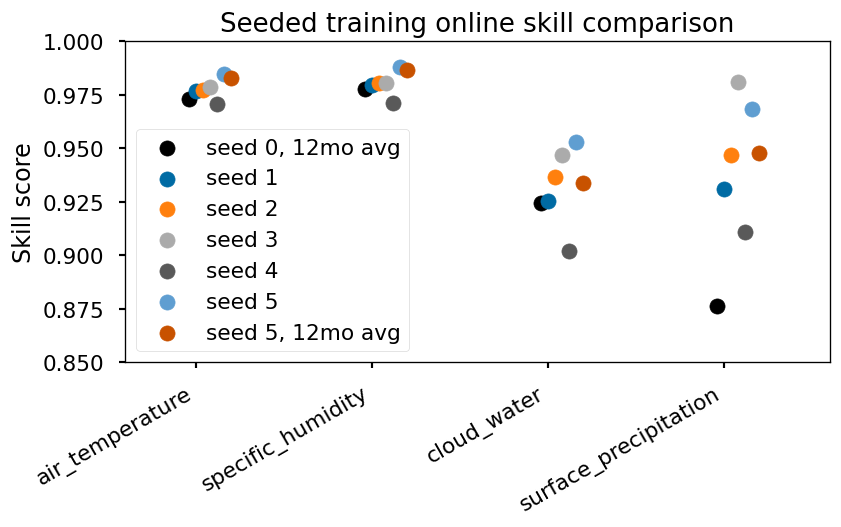

In [20]:
fix, ax = plt.subplots(dpi=120, figsize=(7,4.5))
colors = iter(plt.rcParams["axes.prop_cycle"])
x = np.arange(len(online_init)) * 1.25
plt.scatter(x-0.05, online_init.values, c="k", label="seed 0, 12mo avg")
for i, (skill_name, series) in enumerate(reduced.items()):
    values = series.values
    c = next(colors)
    x_jitter = x + i * 0.05
    plt.scatter(x=x_jitter, y=values, c=c["color"], label=f"seed {i+1}")
plt.scatter(x + (i + 1) * 0.05, y=seed5_inits_avg.values, c=next(colors)["color"], label="seed 5, 12mo avg")
labels = [l.replace("column_skill/", "") for l in series.index]
plt.xticks(ticks=x, labels=labels, rotation=30, ha="right")
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.85, 1)
plt.title("Seeded training online skill comparison")
plt.ylabel("Skill score")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

In [20]:
gscond_seed_data = all_run_data.loc[gscond_seeds]
gscond_seed_data["seed"] = list(range(len(gscond_seeds)))

In [21]:
gsc_data = gscond_seed_data.set_index("seed")[use_cols].transpose()

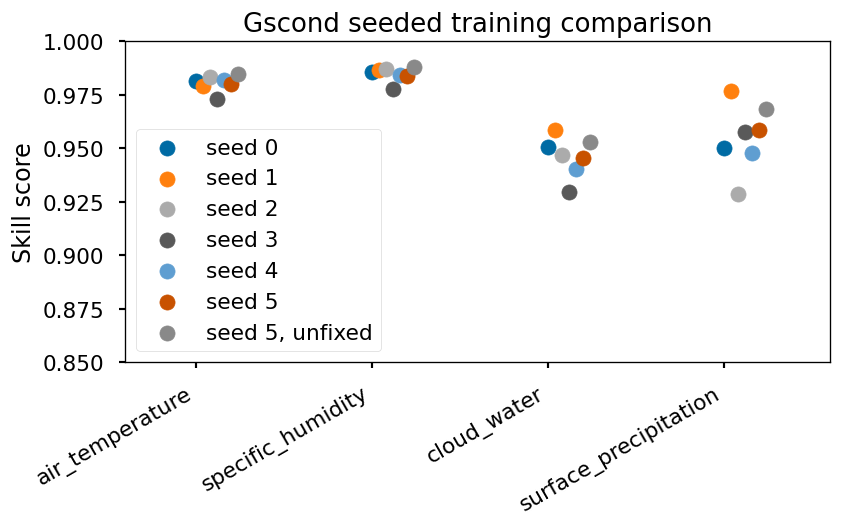

In [38]:
fix, ax = plt.subplots(dpi=120, figsize=(7,4.5))
colors = iter(plt.rcParams["axes.prop_cycle"])
x = np.arange(len(online_init)) * 1.25

for i, (skill_name, series) in enumerate(gsc_data.items()):
    values = series.values
    c = next(colors)
    x_jitter = x + i * 0.05
    plt.scatter(x=x_jitter, y=values, c=c["color"], label=f"seed {i}")
plt.scatter(x + (i + 1) * 0.05, y=unfixed_seed5.values, c=next(colors)["color"], label="seed 5, unfixed")
labels = [l.replace("column_skill/", "") for l in series.index]
plt.xticks(ticks=x, labels=labels, rotation=30, ha="right")
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.85, 1)
plt.title("Gscond seeded training comparison")
plt.ylabel("Skill score")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

## Check sensitivity to seeds gscond vs. classifier vs. precpd

In [23]:
use_seed_runs = {
    "gscond": gscond_seeds,
    "classifier": classifier_sensitivity,
    "precpd": precpd_sensitivity,
}

In [40]:
def to_seed_df(df):
    df["seed"] = list(range(len(df)))
    return df.set_index("seed")[use_cols].transpose()

def plot_scatter_jitter(df, offset=0, symbol="o", do_labels=False):
    
    colors = iter(plt.rcParams["axes.prop_cycle"])

    col_x_loc = np.arange(len(df.index)) * 1.25 + offset
    jitter_offsets = np.arange(len(df.columns)) * 0.03
    
    for i, (skill_name, series) in enumerate(df.items()):
        values = series.values
        c = next(colors)
        plt.scatter(x=col_x_loc + jitter_offsets[i], y=values, c=c["color"], label=f"seed {i}", marker=symbol)

    if do_labels:
        labels = [l.replace("column_skill/", "") for l in series.index]
        plt.xticks(ticks=col_x_loc, labels=labels, rotation=30, ha="right")



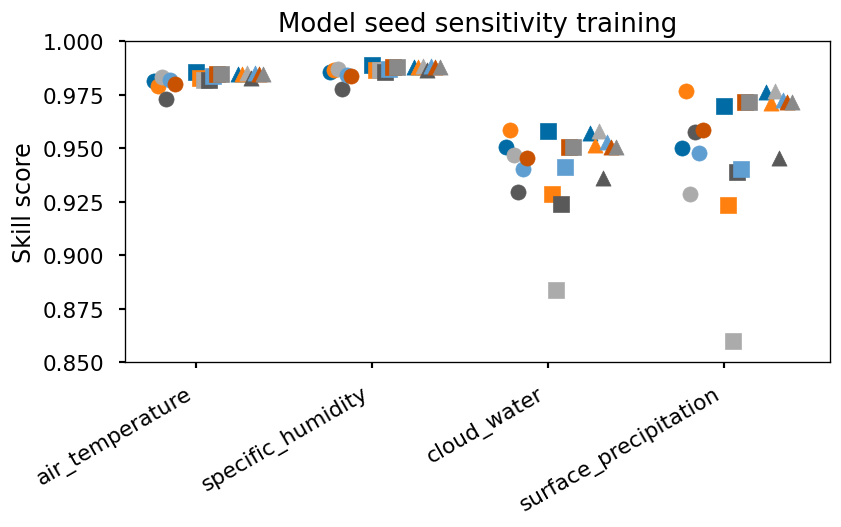

In [42]:
fix, ax = plt.subplots(dpi=120, figsize=(7,4.5))
plot_scatter_jitter(to_seed_df(all_run_data.loc[gscond_seeds]), offset=-0.3, symbol="o")
plot_scatter_jitter(to_seed_df(all_run_data.loc[precpd_sensitivity]), offset=0, symbol="s", do_labels=True)
plot_scatter_jitter(to_seed_df(all_run_data.loc[classifier_sensitivity]), offset=0.3, symbol="^")
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(0.85, 1)
plt.title("Model seed sensitivity training")
plt.ylabel("Skill score")
plt.tight_layout()
plt.show()

## Online skill across months

In [14]:
rh_inits = all_run_data.filter(regex="zcemu.*online", axis=0)

In [15]:
seed5_inits = all_run_data.filter(regex="zc-emu-monthly-seed[\w-]*online", axis=0)
seed5_inits_offline = all_run_data.filter(regex="zc-emu-monthly-seed[\w-]*offline", axis=0)

In [16]:
use_colors = [c["color"] for c in iter(plt.rcParams["axes.prop_cycle"])][0:4]

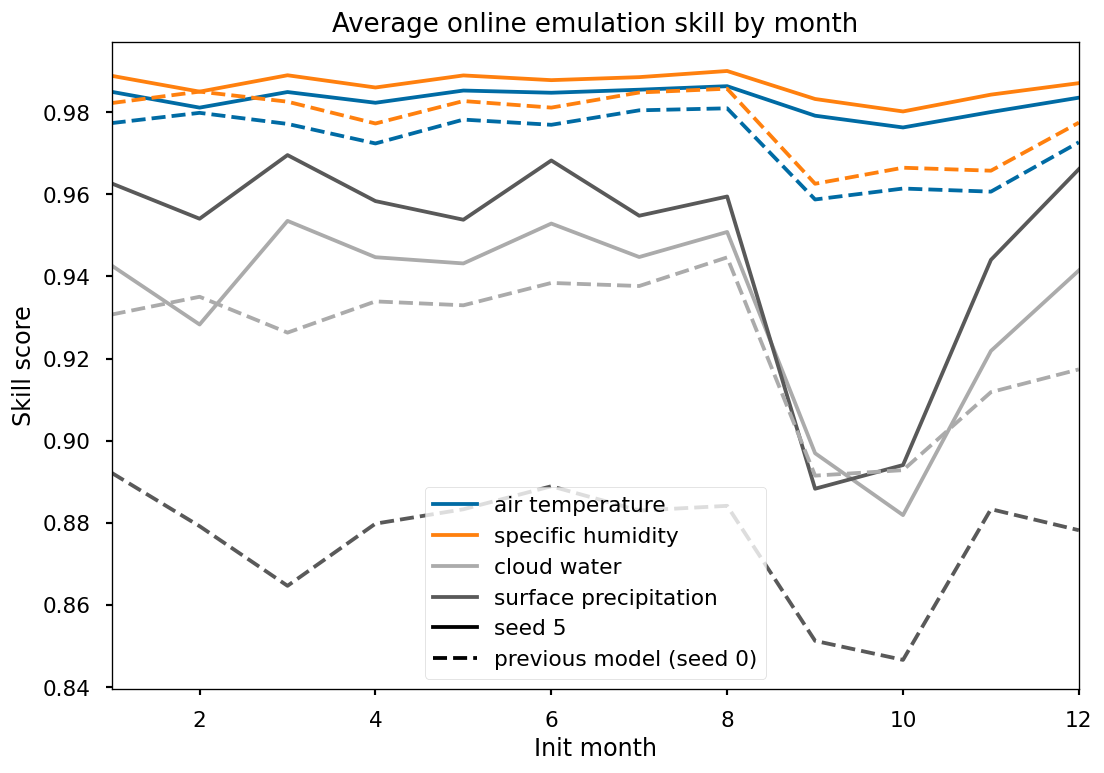

In [46]:
fig, ax = plt.subplots(dpi=120)
seed5_inits.set_axis(range(1,13))[use_cols].plot.line(ax=ax, color=use_colors)
rh_inits.set_axis(range(1,13))[use_cols].plot.line(ax=ax, color=use_colors, linestyle="--")
plt.title("Average online emulation skill by month")
plt.ylabel("Skill score")
plt.xlabel("Init month")
plt.xlim(1,12)
ax = plt.gca()
h, l = ax.get_legend_handles_labels()
h = h[0:4]
h.extend([Line2D([0], [0], color="k"), Line2D([0], [0], color="k", linestyle="--")])
l = ["air temperature", "specific humidity", "cloud water", "surface precipitation", "seed 5", "previous model (seed 0)"]
plt.legend(h, l)
plt.show()

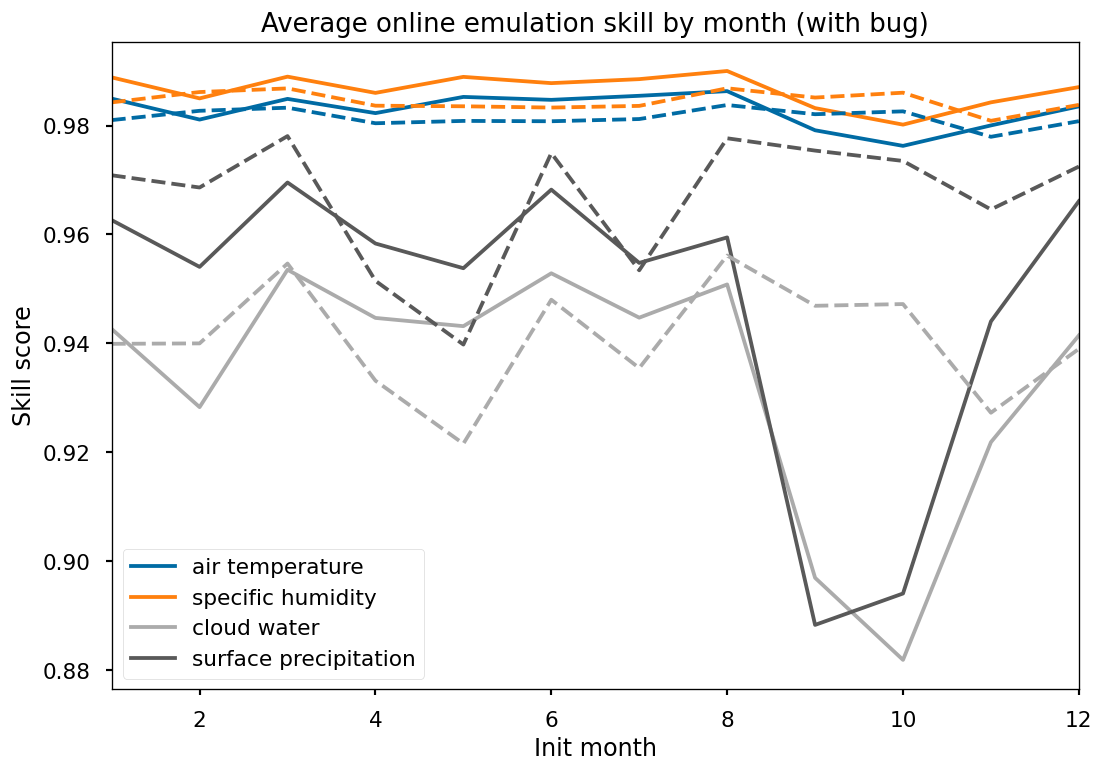

In [17]:
fig, ax = plt.subplots(dpi=120)
seed5_inits.set_axis(range(1,13))[use_cols].plot.line(ax=ax, color=use_colors)
# all_run_data.loc[gscond_seed2].set_axis(range(1, 13))[use_cols].plot(color=use_colors, linestyle="--", ax=ax)
all_run_data.loc[gscond_seed3].set_axis(range(1, 13))[use_cols].plot(color=use_colors, linestyle="--", ax=ax)
plt.title("Average online emulation skill by month (with bug)")
plt.ylabel("Skill score")
plt.xlabel("Init month")
plt.xlim(1,12)
plt.legend(labels=["air temperature", "specific humidity", "cloud water", "surface precipitation"])
plt.show()

In [18]:
all_run_data.loc[gscond_seed3][use_cols].mean(axis=0)

column_skill/air_temperature          0.981461
column_skill/specific_humidity        0.984508
column_skill/cloud_water              0.940780
column_skill/surface_precipitation    0.966741
dtype: float64

## Check classifier usage skill scores

In [25]:
compare_runs = [
    'zc-emu-monthly-seed5-m06-30d-v1-online',
    'zc-emu-no-gscond-classify-v2-online',
    'zc-emu-monthly-seed5-m06-30d-v1-offline'
]

In [26]:
all_run_data.loc[compare_runs]

,column_skill/air_temperature,column_skill/cloud_water,column_skill/specific_humidity,column_skill/surface_precipitation,column_skill/gscond/air_temperature,column_skill/gscond/cloud_water,column_skill/gscond/specific_humidity,column_skill/precpd/air_temperature,column_skill/precpd/cloud_water,column_skill/precpd/specific_humidity,tropical_average_temp_near_tropopause_5d_k,antarctic_avg_column_integrated_cloud_5d_kg,drifts/air_temperature/10day,drifts/cloud_water_mixing_ratio/10day,drifts/specific_humidity/10day
zc-emu-monthly-seed5-m06-30d-v1-online,0.984727,0.952876,0.987797,0.968236,0.985354,0.988424,0.988424,0.967697,0.909715,0.969468,206.181304,0.086456,-0.011457,-2.201456e-08,8.603120e-07
zc-emu-no-gscond-classify-v2-online,0.926453,0.877205,0.929440,0.963577,0.923277,0.926140,0.926140,0.968901,0.896206,0.970515,206.109290,0.088204,-0.011169,3.445058e-08,8.773248e-07
zc-emu-monthly-seed5-m06-30d-v1-offline,0.991259,0.986872,0.994925,0.998387,0.991160,0.995006,0.995006,0.990381,0.985964,0.989332,206.139705,0.078687,NaN,NaN,NaN


## Topline Skill

In [13]:
topline_skill = pd.DataFrame({
    "online": all_run_data.loc[gscond_seed3][use_cols].mean(axis=0),
    "offline": all_run_data.loc[gscond_seed3_offline][use_cols].mean(axis=0),
}).transpose().round(3)
topline_skill

,column_skill/air_temperature,column_skill/specific_humidity,column_skill/cloud_water,column_skill/surface_precipitation
online,0.981,0.985,0.941,0.967
offline,0.991,0.995,0.987,0.998


In [14]:
topline_skill.to_csv("topline_skill.csv")

In [15]:
joined = topline_skill.reset_index()
joined.columns = ["run_type", "dT", "dq", "dc", "pr"]
joined["metric_name"] = ["skill_score", "skill_score"]
joined


,run_type,dT,dq,dc,pr,metric_name
0,online,0.981,0.985,0.941,0.967,skill_score
1,offline,0.991,0.995,0.987,0.998,skill_score


In [16]:
bias_rmse = pd.read_csv("bias_rmse.csv")
bias_rmse.columns = ["run_type", "metric_name", "dT", "dc", "dq", "pr"]
bias_rmse

,run_type,metric_name,dT,dc,dq,pr
0,diagnostic,bias,-0.025601,-0.002871,0.005149,-0.022310
1,offline,bias,-0.019096,-0.000564,0.002485,-0.019664
2,offline,rmse,0.367649,0.127980,0.100102,0.211918
3,online,bias,-0.010531,0.000246,-0.000859,0.017589
4,online,rmse,0.515778,0.284725,0.180276,0.773997


In [19]:
table_for_paper = pd.concat([joined, bias_rmse]).reset_index().drop(columns="index").set_index(keys=["run_type", "metric_name"]).sort_index(ascending=False).transpose().drop(columns="diagnostic")
table_for_paper = table_for_paper.reindex(columns=["offline", "online"], level=0)
table_for_paper

/home/andrep/miniconda3/envs/fv3net/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


run_type        offline                          online                    
metric_name skill_score      rmse      bias skill_score      rmse      bias
dT                0.991  0.367649 -0.019096       0.981  0.515778 -0.010531
dq                0.995  0.100102  0.002485       0.985  0.180276 -0.000859
dc                0.987  0.127980 -0.000564       0.941  0.284725  0.000246
pr                0.998  0.211918 -0.019664       0.967  0.773997  0.017589

In [115]:
print(table_for_paper.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
run\_type & \multicolumn{3}{l}{online} & \multicolumn{3}{l}{offline} \\
metric\_name & skill\_score &      rmse &      bias & skill\_score &      rmse &      bias \\
\midrule
dT &       0.981 &  0.515778 & -0.010531 &       0.991 &  0.367649 & -0.019096 \\
dq &       0.985 &  0.180276 & -0.000859 &       0.995 &  0.100102 &  0.002485 \\
dc &       0.941 &  0.284725 &  0.000246 &       0.987 &  0.127980 & -0.000564 \\
pr &       0.967 &  0.773997 &  0.017589 &       0.998 &  0.211918 & -0.019664 \\
\bottomrule
\end{tabular}



In [ ]:

tmp = ["$\Delta T$ [K/day]", "$\Delta q$ [g/kg/day]", "$\Delta c$ [g/kg/day]", "$pr$ [mm/day]"]

## Scratch

In [65]:
all_run_data.loc[gscond_seed3]["duration_seconds"]

zc-emu-monthly-normfix-m01-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m02-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m03-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m04-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m05-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m06-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m07-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m08-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m09-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m10-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m11-seed3-30d-v1-online    2591100
zc-emu-monthly-normfix-m12-seed3-30d-v1-online    2591100
Name: duration_seconds, dtype: int64